<header style="background-color: rgb(0, 62, 92); color: white; margin-top: 20px; padding:28px; ">
  <img src="Xlogo.png" alt="Transposition of a vector" title="Vector transposition" width="115" style="float: left;">
  <p style=" text-align: center; font-size: 32px;">   
  <strong> l'Ajustement de Valorisation IPV (Independent Price Verification) </strong></p>
  <p style=" text-align: center; font-size: 25px;"><strong> Projet Personnel </strong></p>
  <p style=" text-align: center; font-size: 20px;">     </p>
</header>\

# **l'Ajustement de Valorisation IPV**

- **L’IPV (Independent Price Verification) c’est le processus de contrôle indépendant dans une banque.**

- **L’IPV permet d’éviter que la banque sous-estime ses risques ou survalorise ses positions**

\## ***Introduction***



Le présent travail s’inscrit dans le cadre de l’étude de la valorisation des options, et plus particulièrement des **calls européens**, à travers le modèle de **Black-Scholes**.  
L’objectif principal est d’impliciter la volatilité du sous-jacent à partir des prix de marché, puis d’effectuer un **ajustement de valorisation (IPV : Independent Price Verification)** afin de rapprocher le prix théorique du modèle de la **Juste Valeur** du produit.

---

## Contexte

Nous considérons un call européen écrit sur une action de prix initial :

$$ S_0 $$

avec un prix d’exercice :

$$ K $$

une maturité :

$$ T = 1 $$

et un prix fourni par un pricer, noté :

$$ C(\sigma) $$

En parallèle, nous disposons d’un prix consensus du marché, noté :

$$ C_m $$

fourni par la plateforme **Totem**.

---

## Définition de la fonction

On définit alors la fonction :

$$ f(\sigma) = C(\sigma) - C_m $$

L’objectif est de déterminer la valeur de $\sigma$ telle que :

$$ f(\sigma) = 0 $$

c’est-à-dire la **volatilité implicite** qui égalise le prix théorique du modèle de Black-Scholes avec le prix observé sur le marché.

---

## Méthodologie

Dans un premier temps, une estimation initiale du prix du call a été obtenue en utilisant une **volatilité historique** :

$$ \sigma' = 0.3 $$

Ensuite, pour trouver la volatilité implicite $\sigma$, nous avons recours à l’**algorithme de Newton-Raphson**, qui permet d’approcher efficacement la racine de la fonction $f(\sigma)$.

---

## Formulation de la Juste Valeur

La **Juste Valeur** peut être exprimée comme :

$$ \text{Juste Valeur} = \text{Valorisation Principale} + \text{Ajustement de Valorisation (IPV)} $$

---

Cette démarche nous permettra d’illustrer l’importance de la volatilité implicite dans la valorisation des options et de mieux comprendre le rôle des ajustements nécessaires pour rapprocher les modèles théoriques de la réalité du marché.








Dans le modèle de **Black-Scholes**, le prix du call dépend de $r$, le **taux sans risque**.

Mais en pratique, $r$ n’est pas donné directement → on doit le **construire**.

Les taux observables sur le marché (swaps, obligations, LIBOR) ne sont pas des **taux zéro-coupon instantanés**.  
D’où le besoin de réaliser un **bootstrap** pour obtenir la courbe zéro-coupon.

---

## Obligations et swaps

Les marchés nous donnent :

- prix d’obligations couponnées,  
- taux swap (*swap rates*).  

Mais ces instruments payent des **flux futurs** (coupons fixes ou flottants).

---

## Bootstraping des Zéro-Coupons

On reconstruit une **courbe de taux zéro-coupon** $P(T)$ à partir de ces instruments.

 Objectif : trouver la valeur actualisée d’1€ payé à une date $T$.

---

## Définition du LIBOR

Le **LIBOR** est un taux à court terme, utilisé comme référence pour la **jambe flottante** des swaps.

On définit le taux LIBOR pour une période $\delta$ par :

$$ 1 + \delta \cdot L = \frac{P(t)}{P(t+\delta)} $$

où $P(\cdot)$ est le **facteur d’actualisation zéro-coupon**.

# Exemple : Obligation de 5 ans

On considère une **obligation** de 5 ans avec les caractéristiques suivantes :

- **Notionnel** (montant de référence) : 100 €  
- **Coupons annuels** : basés sur un taux de référence, par exemple le LIBOR  
- **Remboursement à maturité** : récupération du notionnel de 100 €

---

## Objectif

À partir du **prix actuel** de cette obligation et des **flux de coupons connus**, on peut calculer le **facteur d’actualisation zéro-coupon** pour la maturité de 5 ans :

$$
P(5) = \text{facteur d'actualisation pour 5 ans}
$$

Cette obligation permet de **relier les taux courts observables sur le marché (LIBOR)** aux **valeurs actuelles des flux futurs**, afin de construire la **courbe de taux zéro-coupon** nécessaire à la valorisation des options.


# Bootstrap des Zero Coupon à partir des Swap Rates

## Objectif

Construire les **facteurs d’actualisation zéro-coupon** $$P_n$$ pour toutes les maturités.

## Données du marché

- Les **swap rates** $$S_n$$ pour différentes maturités $$n$$.

## Méthode

On calcule les facteurs zéro-coupon itérativement :

$$
P_n = \frac{1 - \delta S_n \sum_{i=1}^{n-1} P_i}{1 + \delta S_n}
$$

On commence par $$P_1$$, puis $$P_2$$, etc., en utilisant les valeurs déjà calculées.

---

## Définition du taux LIBOR

Une fois que tu as $$P_n$$, tu peux calculer le **taux LIBOR** de chaque période :

$$
L_i = \frac{1}{\delta} \left( \frac{P_{i-1}}{P_i} - 1 \right)
$$

où :  
- $$P_{i-1}$$ et $$P_i$$ sont les facteurs zéro-coupon pour des périodes consécutives  
- $$\delta$$ est la fraction de l’année de la période (ex : 0,5 pour 6 mois)

💡 En résumé : le LIBOR correspond au **taux implicite entre deux dates successives** dérivé des facteurs zéro-coupon.

---

## Équilibre du swap

Dans un swap, à l’émission :

$$
\text{Jambe fixe} = \text{Jambe flottante}
$$

- **Jambe fixe** :

$$
\sum_{i=1}^{n} \delta S_n P_i + P_n
$$

- **Jambe flottante** :

$$
\sum_{i=1}^{n} \delta L_i P_i + P_n
$$

En posant l’égalité entre la jambe fixe et la jambe flottante, on peut **déduire $$P_n$$ et $$L_i$$** pour toutes les maturités.






Calculer $$P_n$$ (**facteur zéro-coupon**) ou $$L_n$$ (**taux LIBOR implicite**) pour chaque maturité $$n$$.

## Notations

- $$\delta$$ : fraction de l’année pour la période  
- $$P_i$$ : facteur zéro-coupon pour la période $$i$$  
- $$L_i$$ : taux LIBOR implicite pour la période $$i$$  
- $$S_n$$ : swap rate pour maturité $$n$$  

---

## Formules du swap

L’équilibre entre la **jambe fixe** et la **jambe flottante** est donné par :

$$
S_n \sum_{i=1}^{n} \delta P_i = \sum_{i=1}^{n} \delta L_i P_i
$$

Cette équation dit : **la valeur actualisée des paiements fixes = valeur actualisée des paiements flottants**.

On peut isoler la dernière période ($P_n$ ou $L_n$) :

$$
\delta P_n L_n = S_n \sum_{i=1}^{n} \delta P_i - \sum_{i=1}^{n-1} \delta L_i P_i
$$

où :  
- $$\sum_{i=1}^{n-1} \delta L_i P_i$$ représente la **somme des paiements flottants connus**  
- $$S_n \sum_{i=1}^{n} \delta P_i$$ représente la **valeur totale des paiements fixes**

---

## Variante simplifiée

Si on note l’inconnue par $$x$$, l’équation devient :

$$
\delta P_n x = S_n \sum_{i=1}^{n} \delta P_i - \sum_{i=1}^{n-1} \delta L_i P_i
$$

- Ici $$x = L_n$$ si on cherche le **LIBOR implicite**  
- On peut aussi résoudre pour une autre inconnue selon le problème.

Chaque étape du **bootstrap** isole la dernière inconnue en utilisant les valeurs déjà calculées pour les périodes précédentes.

---

## Interprétation

Pour chaque maturité $$n$$ :  
1. On connaît $$P_1, P_2, \dots, P_{n-1}$$ et $$L_1, \dots, L_{n-1}$$  
2. On connaît $$S_n$$ (swap rate)  
3. On utilise l’équation pour trouver $$P_n$$ ou $$L_n$$


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import root_scalar
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
# Fraction de l'année pour chaque periode (1 an)
delta=1

#Maturités des swaps en années

swap_maturities= np.array([ 1, 2, 3, 4,5, 6, 7, 8, 9, 10])
#Taux  de swaps correspondant a chaque maturité
swap_rates = np.array([0.050, 0.052, 0.053, 0.054, 0.053, 0.052, 0.051, 0.05, 0.045, 0.043])

# Liste des prix zéro-coupon initialisé avec P0=1
zc_prices=[1.0]

#Boostrap des facteurs zéro-coupon à partir des swps rates

for i, S in enumerate(swap_rates):
    n= i+1  # maturité  actuelle
    #Somme des paiements actualisés connus jusqu'à la période n
    sum_discounted = sum(delta * zc_prices[j] for j in range(n))
    #calcul du prix zéro-coupon pour la maturité n

    Pn=(1-S * sum_discounted)/(1+S*delta)
    zc_prices.append(Pn)

zc_prices = np.array(zc_prices)

# Création  d'un vecteur des temps correspondant aux facteurs zéro-coupon

times =np.arange(0,len(zc_prices))

# Calcul des taux LIBOR implicites à partir des ZC
libor_def=[]
for i in range(1, len(zc_prices)):
    L=(1/delta)*(zc_prices[i-1]/zc_prices[i]-1)
    libor_def.append(L)

# Liste pour stocker les taux LIBOR implicites calculés par résolution d'equation

libor_eq=[]

# Boucle sur chaque swap rate

for n,Sn in enumerate(swap_rates,start=1):
    # Calcul du coté droit de l'quation : somme des paiements flottants connus
    rhs = sum(delta *libor_eq[i] * zc_prices[i+1] for i in range(n-1))
    #Calcul du coté gauche de l'equation : valeur totale des paiements fixes
    lhs =Sn * sum(delta * zc_prices[i+1] for i in range(n))

    # Definition de la fonction dont la racine correspond au LIBOR dela periode n

    def equation(Ln):
        return rhs + delta * Ln * zc_prices[n] -lhs

    # Resolution de l'eqution non linéaire pour Ln avec la methode Brent
    sol= root_scalar(equation, bracket=[-0.1, 0.5], method='brentq')
    libor_eq.append(sol.root)

results= pd.DataFrame({
    "Maturity":[f"T{i}" for i in range(1, len(zc_prices))],
    "Swap Rate": swap_rates,
    "Zero Coupon Price": zc_prices[1:],
    "LIBOR (ZC def)": libor_def,   # Taux LIBOR calculés à partir des prix des ZC
    "LIBOR (Eq solving)": libor_eq, # Taux LIBOR calculés par resolution d'éqution
    "Difference" :np.abs(np.array(libor_eq)-np.array(libor_def)) # difference entre les deux methodes

})

print(results)









 On a reconstruit une courbe zéro-coupon cohérente avec les swap rates.

On a trouvé les taux forward (LIBOR) implicites entre périodes.

#**CIM Basis (Credit Intermediation Margin ou Collateralized Initial Margin).**



Le **CIM Basis** est une correction de valorisation qui reflète le coût du collatéral et du financement.  

On le calcule par tranche de temps : sur chaque intervalle

$$
[t_i, \; t_{i+1}],
$$

on multiplie l’exposition attendue par le spread de financement et on actualise.  

Ensuite, on agrège toutes ces contributions pour obtenir le coût total.  

Cette approche permet d’ajuster le prix théorique vers une juste valeur de marché.

Le **CIM Basis** mesure l’écart qu’il faut ajouter ou retrancher pour passer d’une courbe de taux à une autre afin que les valorisations restent cohérentes.


Supposons :

Sur le marché, un swap basé sur EURIBOR 3M doit valoir 100.

Si on  le valorise avec une courbe EURIBOR 6M sans correction, on trouve 101.
Il y a 1 de différence = incohérence.

Cette différence, c’est exactement ce que capture le CIM Basis.
Il corrige la courbe 6M pour qu’elle donne bien le même prix que la courbe 3M


## Définitions des notations (CIM Basis)

- $t_1 < t_2 < t_3$ : dates de refix / échéance  

- $X_{t_i}$ : exposition (MtM ou NPV) à la date $t_i$  

- $m_{t_i}$ : coût de marge initiale (*IM cost*) à la date $t_i$  

- $S_{t_j}$ : spread / basis appliqué à la date $t_j$  

- $B_{t_i \to t_j}$ : basis appliqué à l’exposition de $t_i$ jusqu’à $t_j$  

- $BPV_{t_j}$ : PV01 (base-point value) cumulé jusqu’à $t_j$  

- $P_{t_i,t}$ : facteur d’actualisation de $t$ vu à $t_i$  

- $\alpha_{t_i,t}$ : fraction d’année (accrual) entre $t_i$ et $t$  

- $L_{t_i,t}$ : taux flottant (LIBOR / forward) vu à $t_i$  

- $e_{t_i,t}$ : facteur de day-count associé  

- $CIMValu_{t_j}$ : correction CIM optionnelle en PV01  


# CIM Basis et ajustements de valorisation

Dans le cadre de l’évaluation des produits de taux et du pricing sous collatéralisation, il est essentiel de prendre en compte l’impact du **Collateral Interest Margin (CIM)**.  
Ce dernier correspond au coût lié au financement et au posting de collatéral dans les opérations de marché.

En particulier, on définit le **CIM Basis** comme la différence entre :

- le spread théorique d’un swap à une certaine maturité,  
- et les ajustements dus au coût de financement et de collatéralisation.

---


- $$S_t$$ : spread implicite du swap à la maturité $$t$$.  

$$
S_t = \frac{1 - P_t}{BPV_t}
$$

où $$P_t$$ est le facteur d’actualisation, et $$BPV_t$$ la **Basis Point Value (PV01)** à l’horizon $$t$$.

- $$BPV_t$$ : Basis Point Value ou PV01, qui représente la variation de valeur du swap pour une variation d’1 point de base du taux.  
En pratique, c’est une mesure de sensibilité du prix à un changement infinitésimal de taux.

- $$B_{t_i \to t_j}$$ : basis effectif entre deux maturités $$t_i < t_j$$.  
Il mesure l’impact du coût de financement et du collatéral sur la période $$[t_i, t_j]$$.

- $$X_{t_i t_j}$$ : ajustement CIM ou coût additionnel dû à la collatéralisation, appliqué sur l’intervalle $$[t_i, t_j]$$.

- $$CimB_{t_i t_j}$$ : CIM Basis entre $$t_i$$ et $$t_j$$.  
Il s’écrit :

$$
CimB_{t_i t_j} = S_{t_j} - B_{t_i \to t_j} - X_{t_i t_j}
$$

---

## 3. Décomposition en sous-périodes

Considérons trois maturités $$t_1 < t_2 < t_3$$.  
On peut écrire successivement :

$$
CimB_{t_1 t_2} = S_{t_2} - B_{t_1 \to t_2} - X_{t_1 t_2}
$$

$$
CimB_{t_2 t_3} = S_{t_3} - B_{t_2 \to t_3} - X_{t_2 t_3}
$$

$$
CimB_{t_1 t_3} = S_{t_3} - B_{t_1 \to t_3} - X_{t_1 t_3}
$$

On montre alors la relation d’additivité pondérée par le PV01 :

$$
CimB_{t_1 t_3} = \frac{BPV_{t_2}}{BPV_{t_3}} \, CimB_{t_1 t_2} + CimB_{t_2 t_3}
$$

---

## 4. Expression du basis $$B_{t_1 \to t_3}$$

On a :

$$
B_{t_1 \to t_3} = \frac{1}{BPV_{t_3}}
\Bigg(
\sum_{t \in ]t_1,t_2]} \alpha_{t_1 t} P_{t_1 t}(L_{t_1 t} + CimValue_{t_1 t})
+
\sum_{t \in ]t_2,t_3]} \alpha_{t_2 t} P_{t_2 t}(L_{t_2 t} + CimValue_{t_2 t})
\Bigg)
$$

où :

- $$\alpha_{t_i t}$$ est le jour de compte (year fraction),  
- $$P_{t_i t}$$ est le facteur d’actualisation de $$t$$ vu depuis $$t_i$$,  
- $$L_{t_i t}$$ est le taux forward associé,  
- $$CimValue_{t_i t}$$ est l’ajustement CIM appliqué au taux forward.

On peut simplifier en utilisant les PV01 :

$$
B_{t_1 \to t_3} = \frac{BPV_{t_2}}{BPV_{t_3}} \, B_{t_1 \to t_2} + B_{t_2 \to t_3}
$$

---

## 5. Relation pour les ajustements

De la même manière, on obtient une relation récurrente pour l’ajustement :

$$
X_{t_1 t_3} =
X_{t_1 t_2}\frac{BPV_{t_2}}{BPV_{t_3}}
+ X_{t_2 t_3}
- S_{t_3}
+ \frac{BPV_{t_2}}{BPV_{t_3}} S_{t_2}
$$

En supposant que l’ajustement peut être représenté par une fonction $$f$$, on écrit :

$$
X_{t_i t_j} = f(t_j) \frac{BPV_{t_j}}{BPV_{t_i}}
$$

---

## 6. Intuition financière

- **Pourquoi le CIM ?**  
Lorsqu’une transaction est collatéralisée , la partie qui doit poster du collatéral supporte un coût de financement (elle doit trouver les liquidités).  
Ce coût est modélisé par le CIM.

- **Pourquoi le BPV intervient ?**  
Le PV01 ($$BPV_t$$) mesure la sensibilité d’un swap à une variation des taux.  
Comme le basis s’exprime en spread (donc en bps), il faut ramener toutes les valeurs à un même dénominateur : le PV01.  
C’est pour ça que les formules font apparaître $$\tfrac{BPV_{t_2}}{BPV_{t_3}}$$.

- **Pourquoi une décomposition ?**  
Le CIM Basis sur une longue période $$[t_1, t_3]$$ peut être écrit comme la somme pondérée des sous-périodes.  
Cela reflète le fait que le coût de collatéralisation est additif dans le temps, mais pondéré par la sensibilité de chaque sous-période.


##  Injection et relation clé

 pour $t_1 < t_2 < t_3$ :

$$
X_{t_1 t_3}
=
\frac{BPV_{t_2}}{BPV_{t_3}} X_{t_1 t_2}
+ X_{t_2 t_3}
- S_{t_3}
+ \frac{BPV_{t_2}}{BPV_{t_3}} S_{t_2}
\tag{4}
$$

Cette équation est la clé : elle relie l’ajustement du grand bloc $$[t_1, t_3]$$ aux deux sous-blocs.

---



On pose (hypothèse standard et pratique) :

$$
X_{t_i t_j} = f(t_j)\,\frac{BPV_{t_j}}{BPV_{t_i}}
\tag{5}
$$

Autrement dit, l’ajustement d’un bloc $$[t_i,t_j]$$ ne dépend que de la maturité finale $$t_j$$ (via une fonction $$f$$) et se met à l’échelle avec le ratio de PV01.

Cela implique :

$$
\frac{X_{t_1 t_3}}{BPV_{t_1}/BPV_{t_3}} = f(t_3),
\quad
\frac{X_{t_2 t_3}}{BPV_{t_2}/BPV_{t_3}} = f(t_3),
\quad
\frac{X_{t_1 t_2}}{BPV_{t_1}/BPV_{t_2}} = f(t_2).
\tag{6}
$$

---

##  Identification de $$f$$

Multiplions (4) par $$\tfrac{BPV_{t_1}}{BPV_{t_3}}$$ et remplaçons avec (6).  
Après simplification, on obtient :

$$
f(t_3) = f(t_2)
- S_{t_3}\,\frac{BPV_{t_1}}{BPV_{t_3}}
+ S_{t_2}\,\frac{BPV_{t_1}}{BPV_{t_2}}
$$

Comme l’égalité doit être vraie pour tout $$t_1$$, le seul choix cohérent est :

$$
f(t) = S_t
\tag{7}
$$

---

## Forme finale pratique de $$X$$ et du CIM Basis

En réinjectant (7) dans (5) :

$$
X_{t_i t_j} = S_{t_j}\,\frac{BPV_{t_j}}{BPV_{t_i}}
\tag{8}
$$

Puis en remplaçant dans (1), on obtient pour le CIM Basis :

$$
CimB_{t_i t_j}
=
S_{t_j}
- B_{t_i \to t_j}
- S_{t_j}\,\frac{BPV_{t_j}}{BPV_{t_i}}
\tag{9}
$$




## Pourquoi parle-t-on principalement de swaps dans le CIM Basis ?

Le **CIM Basis** (Collateral & Initial Margin Basis) est une correction de valorisation qui reflète
le coût du **collatéral** et du **funding**.  

Pour le calculer, il faut un instrument financier qui :
- génère des flux sensibles au collatéral,
- et se décompose facilement en expositions élémentaires.

 Dans la pratique, on choisit le **swap de taux** comme référence.

---

### 1. Standardisation
Les swaps (IRS, OIS, basis swaps) sont les produits de taux les plus liquides et les plus standardisés.  
Ils servent de **référence de marché** pour la calibration des courbes.

---

### 2. Construction des courbes
Le prix des swaps est utilisé directement pour **calibrer la courbe des taux**.  
Corriger un swap avec le **CIM Basis** revient à ajuster toute la courbe.

---

### 3. Bloc de construction
Un swap peut se décomposer en une suite de **taux forward**.  
Donc si l’on sait corriger un swap avec le CIM, on peut corriger tout portefeuille
en agrégeant les expositions forward.

---

### 4. Exposition linéaire
Dans un swap, l’exposition (MtM ou NPV) est bien définie à chaque date de refix ou d’échéance :  
$$ t_1 < t_2 < \dots < t_n $$.  

Ceci s’intègre parfaitement à la formule du CIM Basis, qui agrège :

$$
\text{CIM Basis} = \sum_{i} \big( \text{Exposition}(t_i) \times \text{Spread}(t_i) \times \text{Actualisation}(t_i) \big)
$$

---


On parle surtout de **swaps** car ce sont les **produits de référence** qui permettent de définir et de calibrer le CIM Basis.  
Mais la méthodologie n’est **pas limitée aux swaps** :  
une fois calibrée, elle peut s’appliquer à tout produit de taux (swaptions, caps/floors, produits exotiques…).


#**Remarque**


- Le **CIM Basis** reflète le coût du collatéral et du financement pour des produits de taux ou des dérivés collatéralisés.  

- Les **options sur actions** sont rarement financées via un collatéral spécifique comme un swap de taux.  

- Pour un **call**, la valorisation dépend surtout de :
  - Le **prix du sous-jacent**  
  - La **volatilité**  
  - Le **taux sans risque**  
  - Le **temps jusqu’à l’échéance**  

> Autrement dit, inclure le CIM dans un call ne change pratiquement rien à la **valeur théorique** ou à l’**IPV**.


In [ ]:
class DiscountCurve:
     """
     Classe qui represente une courbe de taux ZC et perment de calculer
     les facteurs d'actualisation , les taux forward et la BPV.

     tenors_months : maturités
     zero_rates_annuel : taux actuariel annuel
     freq: frequence de paiement

     """
     def __init__(self, tenors_months, zero_rates_annuel, freq=4):
         self.tenors = np.array(tenors_months)/12
         self.zero_rates = np.array(zero_rates_annuel)
         self.freq = freq

         #ON construit directement les discount factors par bootstrapping
         self.discount_factors = self.bootstrap_discount_factors()

     def bootstrap_discount_factors(self):
         """
         Calcule les facteurs d'actualisation à partir des taux ZC
         Formule : DF(t) = exp(-r * t)
         """
         return np.exp(-self.zero_rates * self.tenors)

     def get_discount_factor(self, t):
         """
         Récupère un facteur d'actualisation pour un temps t.
         si t est en dehors des bornes , extrapole avec les extremes .
         sinon , interpole lineairement .
         """
         if t <= 0:
             return 1.0
         elif t >= self.tenors[-1]:
             return self.discount_factors[-1] # Au delà on prend la dernière valeur

         else:
             return np.interp(t, self.tenors, self.discount_factors) # interpolation lineaire

     def forward_rate(self, t1,t2):
         """
         Calcule le taux forward entre deux maturités t1 et t2
         Formule : F = (DF(t1)/DF(t2) - 1) / (t2 - t1)

         """
         df1=self.get_discount_factor(t1)
         df2=self.get_discount_factor(t2)
         return ((df1/df2)-1)/(t2-t1)

     def get_periods(self, t_start,t_end, step):
         """
         Génère des dates de paiement entre t_start et t_end
         espacées d'un pas step(en années)
         """
         n=int(round((t_end-t_start)/step))
         return [t_start+i*step for i in range(1,n+1)]


     def compute_bpv(self, t_start, t_end, step):
         """
         Calcule la BPV sur l'intervalle [t_start, t_end] avec un pas step
         Formule : somme des DF(t) * step
         """
         periods=self.get_periods(t_start, t_end, step)
         return sum([self.get_discount_factor(t)*step for t in periods])





In [ ]:
def compute_bpv_ti(curve, t_i,step):
    """
    Calcule le BPV(Base Point Value) sur la dernière periode [t_i - step, t_i].
    Sert  à ponderer les flux de fin de periode par les DF.
    """
    return curve.compute_bpv(t_i-step, t_i, step)


def compute_bpv_ti_tj(curve, t_i, t_j, step):
    """
    Calcule le BPV(Base Point Value) entre deux dates  t_i et t_j (plus général que ci-dessus)
    """
    return curve.compute_bpv(t_i, t_j, step)

# Fonction principale :B_ti_tj
def compute_B_ti_tj(curve, t_i, t_j, cim_guess=0.003):
    """
    Calcule la composante B_{ti -> tj}, i.e. le coût de financement CIM sur [t_i, t_j].
    """
    step=t_j-t_i
    bpv_tj=compute_bpv_ti(curve, t_i, step)
    periods=curve.get_periods(t_i, t_j, step)
    print(f"Periodes discrètes entre {t_i} et {t_j} :",periods)

    u,v=0, 0 # u =terme lié aux taux forward  , v =coût CIM

    for t in periods:
        p=curve.get_discount_factor(t-step)
        L_t=curve.forward_rate(t-step, t)
        u+=step *p*L_t
        v+= step * p * cim_guess # coût de collatéral supposé constant
    B_ti_tj=(u +v)/bpv_tj
    return B_ti_tj

# Composition de deux blocs B

def Compose_B(curve, ti, tj,tk, B_ti_tj, B_tj_tk):
    """
    Combine deux contributions B : B_ti_tj et B_tj_tk en une seule de ti -> tk.
    Utile si on veut approximer un long intervalle par sous-intervalles.
    """
    stepji=tj-ti
    stepjk=tk-tj
    bpv_tj=compute_bpv_ti(curve, ti, stepji)
    bpv_tk=compute_bpv_ti(curve, tj, stepjk)

    result=B_ti_tj * (bpv_tj/bpv_tk) + B_tj_tk
    return result

# Fonction finale CIM

def compute_cim_between(curve, t_i,t_j, cim_guess=0.003):
    """
    Calcule la correction CIM complète entre deux dates t_i et t_j.
    retourne :
    cim : la correction totale
    cim_calue: composante v (impactdu coût CIM)
    S_ti, S_tj:spreads implicites
    B_ti_tj: coût de financement CIM sur [t_i, t_j]
    X_ti_tj: ajustement CIM sur [t_i, t_j]
    """
    step=t_j-t_i

    #Discount factors

    p_ti=curve.get_discount_factor(t_i)
    p_tj=curve.get_discount_factor(t_j)

    #BPV des extrémités
    bpv_ti=compute_bpv_ti(curve, t_i, t_i)
    bpv_tj=compute_bpv_ti(curve, t_j, step)

    #Spreads implicites
    S_ti=(1-p_ti)/bpv_ti
    S_tj=(1-p_tj)/bpv_tj

    # Liste des periodes de discretisation
    periods = curve.get_periods(t_i, t_j, step)
    print(f"Périodes sur [{t_i}, {t_j}] :", periods)

    u, v=0,0
    for t in periods:
        p=curve.get_discount_factor(t-step)
        L_t=curve.forward_rate(t-step, t)
        u+=step*p*L_t
        v+=step*p*cim_guess
    # Calcul B_ti_tj et X_ti_tj
    B_ti_tj=(u+v)/bpv_tj
    X_ti_tj=S_ti* (bpv_ti/bpv_tj)

    #Correction CIM
    cim=S_tj-B_ti_tj-X_ti_tj
    cim_value= -v /bpv_tj



    # Affichage
    print(f"[{t_i:.2f} → {t_j:.2f}] CIM: {cim:.6f}, CIM_value: {cim_value:.6f}")

    return cim, cim_value, S_ti, S_tj, B_ti_tj, X_ti_tj





In [ ]:
# === Exécution ===
if __name__ == "__main__":
    # Courbe de taux zéro en entrée (teneurs en mois, taux annualisés)
    tenors = [3, 6, 9, 12]  # 3M, 6M, 9M, 1Y
    zero_rates = [0.025, 0.027, 0.029, 0.031]  # taux zéro
    curve = DiscountCurve(tenors_months=tenors, zero_rates_annuel=zero_rates)

    # Intervalles considérés
    t1, t2, t3 = 0.25, 0.5, 1.0  # 3M, 6M, 1Y en fractions d'années

    # Hypothèses CIM sur chaque intervalle
    CimValue12, CimValue23 = 0.003, 0.0025

    # === Calcul CIM sur les sous-intervalles ===
    cim_12, cimVal_12, S_ti, S_tj, B_t1_t2, X_ti_tj = compute_cim_between(curve, t1, t2, CimValue12)
    cim_23, cimVal_23, S_ti, S_tj, B_t2_t3, X_ti_tj = compute_cim_between(curve, t2, t3, CimValue23)

    # === Calcul des BPV ===
    step = 0.25  # Pas de 3 mois
    bpv1 = compute_bpv_ti(curve, t1, step)            # BPV jusqu'à t1
    bpv12 = compute_bpv_ti_tj(curve, t1, t2, step)    # BPV entre [t1, t2]
    bpv2 = compute_bpv_ti(curve, t2, t2 - t1)         # BPV jusqu'à t2
    bpv23 = compute_bpv_ti_tj(curve, t2, t3, t3 - t2) # BPV entre [t2, t3]
    bpv3 = compute_bpv_ti(curve, t3, t3 - t2)         # BPV jusqu'à t3

    # === Composition du CIM 3M → 1Y à partir des sous-intervalles ===
    # Formule de composition (pondération par les BPV)
    cimVal_13_composed = cimVal_12 * (bpv2 / bpv3) + cimVal_23

    # Variante simplifiée (équivalente mais écrite différemment)
    cimVal_13_composed_simple = -CimValue12 * (bpv1 / bpv3) - CimValue23 * (bpv2 / bpv3)

    # Variante bis (autre écriture de la composition)
    cimComposedBis = -CimValue12 * (bpv12 / bpv2) * (bpv2 / bpv3) - CimValue23 * (bpv23 / bpv3)

    # === Affichage des résultats composés ===
    print(f"CIM_value[3M→1Y] (composé): {cimVal_13_composed:.6f}")
    #print(f"CIM_value[3M→1Y] (composé simple): {cimVal_13_composed_simple:.6f}")
    print(f"CIM_value[3M→1Y] (composé simple): {cimComposedBis:.6f}")

    # === Calcul direct CIM sur [3M, 1Y] pour comparaison ===
    cim_13, cimVal_13, S_ti, S_tj, B_t1_t3, X_ti_tj = compute_cim_between(curve, t1, t3, -cimVal_13_composed)
    # cim_13, *_ = compute_cim_3_steps(curve,t1,t2,t3,CimValue12,CimValue23)  # alternative multi-step

    print(f"CIM_value[3M→1Y] (direct): {cimVal_13:.6f}")


**Interpretation du résultat**

L’intervalle va de 3M (0.25 an) à 6M (0.5 an).

La seule période de paiement dans cet intervalle est à 0.5 an.

Le calcul donne un CIM ≈ -0.003234 et sa valeur associée (CIM_value ≈ -0.003022).

cela signifie que l’écart de base CIM sur cette jambe courte est négatif, donc il faut réduire le spread appliqué pour rendre la jambe flottante équivalente à la jambe fixe.

#  **Structure de la dette et lien avec l’IPV**

La **structure de la dette** décrit comment on fixe le prix d’une obligation à son émission.  
- On part d’un taux de référence (souvent un taux sans risque, noté \(ref\)).  
- On ajoute un **spread de crédit** (\(s_0\)) qui reflète le risque spécifique de l’émetteur.  
- Le coupon payé est alors \(c_0 = ref + s_0\).  

L’objectif est que l’obligation **sorte au pair** (prix = 100).  
Cela signifie qu’on choisit le spread initial \(s_0\) de manière à ce que la somme des flux actualisés soit égale au nominal.




## 1. Principe à l’émission
Lorsqu’une entreprise émet une obligation, elle souhaite que son prix initial soit **au pair** (100% du nominal).  

Le coupon initial est donc fixé comme suit :

$$
c_0 = ref + s_0
$$

- \(ref\) = taux sans risque de référence (Euribor, OIS, etc.),  
- \(s_0\) = spread de crédit initial (prime de risque de l’émetteur).  

---

## 2. Prix initial de l’obligation
Le prix de l’obligation est égal à la somme des **flux futurs actualisés** avec le taux \(ref + s_0\).  

$$
\pi_0 = \sum_{i=1}^{M} \frac{N \cdot c_0}{(1+ref+s_0)^{t_i}} + \frac{N}{(1+ref+s_0)^{t_n}}
$$

où :  
- \(N\) = nominal,  
- \(M\) = nombre de coupons,  
- \(t_i\) = échéance du i-ème coupon,  
- \(t_n\) = maturité finale.  

Le choix de \(s_0\) permet d’avoir $\pi(0)$= 100.

---

## 3. Fonction prix en fonction du spread
On définit une fonction de prix **en fonction d’un spread générique \(s\)** :

$$
\pi(s) = N \cdot \sum_{i=1}^{M} \frac{c}{(1+ref+s)^{t_i}} + \frac{N}{(1+ref+s)^{t_n}}
$$

- Cette fonction est **décroissante en \(s\)** : plus le spread est grand → plus les flux sont actualisés → prix plus faible.

---

## 4. Dérivée de la fonction de prix
La dérivée de $(pi(s))$ par rapport au spread permet de résoudre numériquement l’équation $(\pi(s)$=$\pi(mkt))$.  

On obtient :

$$
\pi'(s) = -N \cdot \sum_{i=1}^{M} \frac{t_i \cdot c}{(1+ref+s)^{t_i+1}}
          - \frac{N \cdot t_n}{(1+ref+s)^{t_n+1}}
$$

Cette dérivée est utilisée par la méthode de **Newton-Raphson** pour trouver le spread de marché.

---

## 5. Spread de marché implicite
Si on observe un prix de marché $\pi(mkt)$, le **spread de marché implicite** \(s_{mkt}\) est défini comme la solution de :

$$
\pi(s_{mkt}) = \pi_{mkt}
$$

En pratique, on résout cette équation numériquement.

---

## 6. Lien avec l’IPV
- En interne, la banque valorise l’obligation avec un spread \(s_0\).  
- Le marché donne un prix observé $(pi_{mkt})$.  
- On calcule alors $(s_{mkt})$tel que $(pi(s_{mkt})$ = $pi_{mkt}).$  

Si $(pi(s_0) $ est different  de $pi_{mkt}) $, il faut ajuster la valorisation interne.  
C’est exactement ce qu’on appelle **l’IPV (Independent Price Verification)**.  

En résumé :  
- **Structure de la dette** : définit le lien entre prix et spread.  
- **IPV** : vérifie que le spread/prix interne est cohérent avec celui du marché.  

---


In [ ]:
OneBP=0.0001 # 1 point de base en taux decimal
refRate = results['LIBOR (Eq solving)'][1] *OneBP # Taux de reference (Libor converti en decimal)
s0=75 * OneBP # Spread initial de l'bligation
coupon0 =refRate + s0 # coupon initial
ParDiscount = coupon0 # on utilise ce taux comme discount
Notional =100 # Nominal de l'obligation
Maturity=1 # Maturuté en années


 #****Fonction pour calculer le prix de l'obligation ************
def BondPrice(refrate, spread,discount, maturity,notional):
    """
    Calcule le prix d'une obligation à coupon fixe
    refrate : taux de référence (Libor)
    spread : spread de l’obligation
    discount : taux utilisé pour actualiser les flux (approximation)
    maturity : maturité en années
    notional : nominal
    """
    #Somme des coupons actualisés
    leg= sum([(refrate + spread)/(1+discount)**i for i in range(1,maturity+1)])

    # Actualisation du principal
    discountEnd= 1 /(1 + discount)**maturity
    # Prix total = flux des coupons + Nominal
    return (leg + discountEnd) *notional


#*****Fonction pour calculer la sensibilité du prix à une variation du spread**********

def dBondPrice(discount, maturity,notional):
    """
    Calcule la dérivée du prix de l'obligation par rapport au spread
    """
    return notional * sum([1/(1+discount)**i for i in range(1, maturity+1)])


#**** Fonction pour obtenir le spread implicite à partir du prix du marché****

def GetSpreadFromPrice(refrate,discount, maturity, notional, price):
    """
     Déduit le spread implicite pour que le prix théaorique corresponde au prix
     observé dans le marché.
     price : prix observé

    """
    leg= sum([refrate/(1+ discount)**i for i in range(1,maturity+1)])
    bpv=sum([1/(1+discount)**i for i in range(1,maturity+1)])
    discountEnd= 1 / (1+ discount)**maturity
    return(price/notional - leg - discountEnd) /bpv

# Calcul du prix initial et du prix après variation de spread

initialPrice = BondPrice(refRate, s0, ParDiscount, Maturity, Notional)  # Prix initial
delta = 160 * OneBP  # Variation hypothétique du spread (en décimal)
newPrice = BondPrice(refRate, s0 + delta, ParDiscount, Maturity, Notional)  # Nouveau prix après delta

# ===========================================
# Calcul de la sensibilité (BPV approximative)
# ===========================================
sensi = dBondPrice(ParDiscount, Maturity, Notional)  # Somme des actualisations des flux unitaires

# ===========================================
# Déduction du spread implicite à partir du nouveau prix
# ===========================================
TehoSpread = GetSpreadFromPrice(refRate, ParDiscount, Maturity, Notional, newPrice) / OneBP

# ===========================================
# Affichage des résultats
# ===========================================
print(f"New price : {newPrice}")
print(f"Initial price + delta * sensi : {initialPrice + delta * sensi}")
print(f"TheoSpread - spread0 : {TehoSpread - s0/OneBP}")
print(f"Market spread - spread0 : {delta/OneBP}")

# Taux de marché final
MarketRate = refRate + TehoSpread * OneBP
print(f"MarketRate : {MarketRate}")


# Analyse des résultats : Prix et Spread d'une obligation

---

New price 101.58808080043158

C’est le prix de l’obligation après avoir appliqué un changement de spread (`delta = 160 bp` ou 0.016).  

On voit que le prix a augmenté légèrement au-dessus de 100 (le pair), ce qui est attendu si le spread influence le coupon.

---

Initial price + delta * sensi :101.58808080043157


C’est une approximation linéaire du nouveau prix à partir du prix initial en utilisant la **sensibilité du prix au spread** (`sensi = dBondPrice`).  

La formule utilisée :

$$
\text{prix approx} = \text{prix initial} + \delta \times \text{sensi}
$$

Le fait que cette valeur soit presque identique au vrai `New price` montre que la **linéarisation fonctionne très bien** pour ce petit changement de spread.

---

TheoSpread - spread0: 160.00000000000023


- `TheoSpread` est le spread calculé à partir du nouveau prix via la fonction `GetSpreadFromPrice`.  
- La différence avec le spread initial (`spread0`) est exactement 160 bp, ce qui correspond exactement au delta appliqué.  
- Cela montre que le modèle est **cohérent** et que le calcul inverse du spread fonctionne.

---

Market spread - spread0:160.0


- Ici on compare le **spread du marché simulé** (delta) avec le spread initial.  
- On retrouve encore 160 bp, ce qui confirme que notre méthode de calcul est **précise**.

---

MarketRate :0.023505411289640617


C’est le **taux effectif du marché** après ajustement du spread :  

$$
\text{MarketRate} = \text{refRate} + \text{TheoSpread} \times 1\,\text{bp}
$$

- Cela donne le **taux que le marché demanderait** pour que l’obligation se vende exactement au nouveau prix.

---

***Interprétation globale***

- On simule l’effet d’un changement de spread sur le prix de l’obligation.  
- Le calcul de la **sensibilité** (`dBondPrice`) permet de vérifier la linéarité approximative.  
- Le spread de marché retrouvé (`TheoSpread`) permet de revenir du prix au spread, ce qui est exactement ce que fait l’**IPV** : ajuster le prix pour tenir compte des spreads, du marché et du collatéral.  

Autrement dit, c’est la même logique que pour le **CIM** : on ajuste un paramètre de marché pour retrouver une valeur cohérente avec le prix observé.













## **Modèle de Balck Scholes**

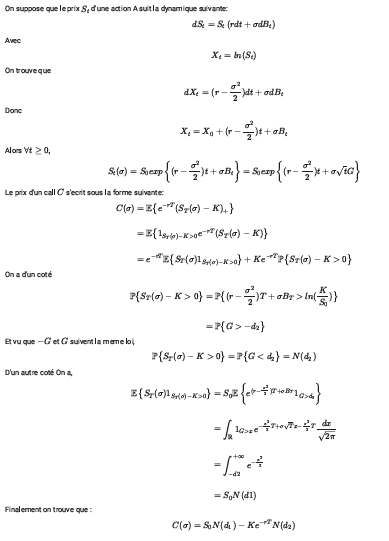

**NB**: on a pris le taux sans risque r comme MarketRate = taux réel ajusté pour spreads → reflète la valeur de marché actuelle, calculer precedement dans la structure de la dette.

In [ ]:


import numpy as np
from scipy.stats import norm

# Paramètres
T = 1           # Maturité
S_0 = 100       # Prix initial de l'action
r = MarketRate  # Taux sans risque (défini précédemment)
sigma_h = 0.3   # Volatilité hypothétique
K = 110         # Prix d'exercice
C_m = 10        # Prix du call observé sur le marché

# Fonctions pour Black-Scholes
def d1(x):
    return (1/(x*np.sqrt(T))) * (np.log(S_0/K) + (r + 0.5*x**2)*T)

def d2(x):
    return d1(x) - x*np.sqrt(T)

def call_ferme(x):
    return S_0 * norm.cdf(d1(x)) - K * np.exp(-r*T) * norm.cdf(d2(x))

# Calcul du prix théorique du call
call_price = call_ferme(sigma_h)
print("Prix théorique du call (BS) :", call_price)


# Recherche de la volatilité implicite via Newton-Raphson

On cherche à résoudre l'équation :  

$$
C(\sigma) - C_m = 0
$$

où $C(\sigma)$ est le prix théorique du call (modèle Black-Scholes) et $C_m$ le prix observé sur le marché.  

Pour cela, on utilise l'algorithme de **Newton-Raphson**.

## Définition

Soit une fonction $f(x)$, la méthode de Newton-Raphson définit la suite itérative suivante :  

$$
\begin{cases}
x_0 = v \\
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
\end{cases}
$$

Ici :  

$$
f(\sigma) = C(\sigma) - C_m
$$

La dérivée de $C(\sigma)$ par rapport à $\sigma$ (appelée **Vega**) est :  

$$
\frac{\partial C(\sigma)}{\partial \sigma} = S_0 \sqrt{T} \, N'(d_1)
$$

où $N'(x)$ est la densité de la loi normale :  

$$
N'(x) = \frac{1}{\sqrt{2 \pi}} e^{-x^2 / 2}
$$

Ainsi, la mise à jour de $\sigma$ à chaque itération est :  

$$
\sigma_{n+1} = \sigma_n - \frac{C(\sigma_n) - C_m}{\text{Vega}(\sigma_n)}
$$

On répète ce processus jusqu'à convergence, c’est-à-dire jusqu’à ce que $|C(\sigma_n) - C_m|$ soit suffisamment petit.


In [ ]:
# Fonction f(x) : différence entre le prix théorique du call et le prix du marché
# C'est cette fonction dont on cherche la racine (f(x) = 0)
def f(x):
    return call_ferme(x) - C_m


def dN(x):
    return 1 / (np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# Dérivée de f(x) par rapport à la volatilité sigma
# Nécessaire pour l'algorithme de Newton-Raphson
def df(x):
    return S_0 * np.sqrt(T) * dN(d1(x))

# Algorithme de Newton-Raphson pour trouver la racine d'une fonction
# x_0 : point de départ
# conf : tolérance pour arrêter l'itération
# max_iter : nombre maximal d'itérations
# g : fonction dont on cherche la racine
# dg : dérivée de g
def newton_raphson(x_0, conf, max_iter, g, dg):
    x_n = x_0
    for i in range(max_iter):
        x_n_plus_1 = x_n - g(x_n) / dg(x_n)  # itération Newton-Raphson
        if abs(x_n_plus_1 - x_n) < conf:      # condition de convergence
            return x_n_plus_1
        x_n = x_n_plus_1
    print("solution non trouvée")

# Application : on cherche la volatilité implicite sigma à partir du prix du marché
sigma_prim = newton_raphson(1, conf=10**-5, max_iter=1000, g=f, dg=df)
print(sigma_prim)


# Définition de l'IPV

La **Vérification Indépendante des Prix (IPV)** est un processus de plus en plus important pour soutenir les fonctions financières et de risque dans un large éventail d'institutions financières.  

Le processus de base de l'IPV exige que les prix internes soient vérifiés par rapport à des **sources tierces indépendantes**.

Le **Prudent Valuation Guidance** de Bâle II définit la Vérification Indépendante des Prix comme :  
*"le processus par lequel les prix du marché ou les données d'entrée des modèles sont régulièrement vérifiés pour s'assurer de leur exactitude".*  

La vérification des prix du marché ou des données du modèle doit être effectuée par une **unité indépendante de la salle des marchés**, au moins une fois par mois (ou, selon la nature du marché/de l'activité de négociation, plus fréquemment).

---

## Application numérique

### Sensibilité

Le **Vega** est un type de grecque utilisé pour calculer la sensibilité ou le taux de variation de la valeur d'un contrat d'option par rapport à la volatilité de l'actif sous-jacent.  

Le Vega est désigné par la lettre \(V\). Essentiellement, le Vega est la **dérivée partielle première** de la valeur du contrat d'option par rapport à la volatilité de l'actif sous-jacent :  

$$
V = \frac{\partial C(\sigma)}{\partial \sigma}
$$

où $(C(\sigma))$ est le prix de l'option en fonction de la volatilité $(\sigma)$.



L'ajustement de valorisation peut être exprimé via le Vega pour quantifier l'impact d'une variation de la volatilité sur la valeur de l'option   





In [ ]:
sensi=S_0*np.sqrt(T)*dN(d1(sigma_h))
print("Sensibilité du call à la volatilité :", sensi)

## Remarque

En pratique, pour calculer la **sensibilité** d'une option (le Vega), on utilise souvent une **approximation numérique** plutôt que la dérivée analytique.  

La formule utilisée est la suivante :  

$$
\text{sens} = \frac{\partial C(\sigma)}{\partial \sigma} \approx \lim_{\delta\sigma \to 0^+} \frac{C(\sigma_h + \delta\sigma) - C(\sigma_h)}{\delta\sigma}
$$

Pour les calculs de marché, on prend généralement un **pas très petit**, par exemple 1 point de base (1 bp) :  

$$
\text{sens} \approx \frac{C(\sigma_h + 1\text{bp}) - C(\sigma_h)}{1\text{bp}}
$$

Cette approche numérique est simple à mettre en œuvre et fonctionne très bien pour de petits changements de volatilité.


In [ ]:
sensi_bis=(call_ferme(sigma_h+0.0001)-call_ferme(sigma_h))/0.0001
print(sensi_bis)

##IPV ( sensi choc )
**Définitions**

Dans le cadre de l’IPV (Independent Price Verification), un **choc** correspond à une modification simulée d’un paramètre de marché (ici, la volatilité) pour évaluer l’impact sur la valeur de l’instrument.

Si l’on note :

- $( \sigma_h )$: volatilité de référence utilisée pour valoriser l’option,  
- $( \sigma' )$ : nouvelle volatilité simulée (après le choc),  
- $( \text{sens} )$ : sensibilité du prix de l’option par rapport à la volatilité (Vega),  

alors le **choc de prix** est défini par :

$$
\text{choc} = (\sigma' - \sigma_h)
$$

L’impact sur la valeur de l’option dans l’IPV s’écrit alors :

$$
\text{IPV} = \text{choc} \cdot \text{sens} = (\sigma' - \sigma_h) \cdot \text{sens}
$$

---

**Interprétation** :

- On simule une variation de la volatilité $( (\sigma' - \sigma_h) )$ pour voir comment le prix de l’option réagirait.  
- La sensibilité (Vega) permet de convertir ce choc de volatilité en variation de prix.  
- Ce mécanisme est exactement ce que l’IPV utilise pour s’assurer que la valorisation est cohérente avec des scénarios de marché réalistes.


In [ ]:
IPV=(sigma_prim-sigma_h)*sensi
print(IPV)

In [ ]:
call_ferme(sigma_prim)

Finalement, on calcule le **proxy de la Juste Valeur** comme suit :

### Ajustement de valorisation

$$
\text{Juste Valeur} = \text{Valorisation principale} + \text{Ajustement de valorisation (IPV)}
$$


In [ ]:
fair_value=call_ferme(sigma_h)+IPV
print(fair_value)

## Remarques et Juste Valeur

### Remarque 1
On retombe bien sur une valeur proche du prix sur le marché.  
Cela confirme la cohérence de notre modèle par rapport aux observations réelles.

### Remarque 2
Grâce au développement de **Taylor-Young** au point $$\sigma_h$$, on peut approximer la variation de prix en fonction de la volatilité.  
Cette approximation linéaire est particulièrement utile pour des petites variations et permet de simplifier les calculs.

### Définition
D'après la norme **IFRS 13**, la "juste valeur" (ou "fair value" en anglais) se définit comme :

***"le prix qui serait reçu pour la vente d'un actif ou payé pour le transfert d'un passif lors d'une transaction normale entre des participants de marché bien informés à la date d'évaluation"***.

**Remarque importante :** la Juste Valeur est donc un concept de marché, et non une valeur comptable arbitraire.

### Approximation de la Juste Valeur
En utilisant le développement de Taylor, on a :

$$
C(\sigma') \approx C(\sigma_h) + (\sigma' - \sigma_h) \frac{\partial C}{\partial \sigma}(\sigma_h)
$$

ou, en termes de sensibilité ($sensi$) :

$$
C(\sigma') \approx C(\sigma_h) + (\sigma' - \sigma_h) \cdot sensi \approx \text{Juste Valeur} \approx C_m
$$

**Notes supplémentaires :**  
- $\sigma_h$ : volatilité de référence utilisée pour valoriser l’option.  
- $\sigma'$ : volatilité après choc simulé.  
- $sensi$ : Vega, sensibilité de l’option à la volatilité.  
- $C_m$: prix observé sur le marché ou prix de référence.  

Cette approximation est au cœur de l’**IPV (Independent Price Verification)**, qui vise à vérifier que le modèle produit une valorisation cohérente avec le marché.

### Application pratique


1. On simule un **choc de volatilité** : $\sigma' - \sigma_h$.

2. On calcule l’impact sur la valeur de l’option grâce à $sensi$.  
3. On obtient un **ajustement de valorisation** pour se rapprocher de la Juste Valeur.

### Conclusion
D'après les remarques et l’approximation de Taylor, notre démarche permet de retrouver la **Juste Valeur**, qui est approximativement la valeur sur le marché.  
Cette approche est exactement la logique utilisée dans l’IPV e : **ajuster les paramètres de marché pour obtenir une valorisation cohérente avec les observations réelles**.






## **Synthèse globale**



- "Avant toute valorisation d’options ou ajustement de prix, on doit **construire la courbe zéro-coupon** via **bootstrap**.  
- On part des instruments observables (swaps, obligations, LIBOR) pour obtenir les **facteurs d’actualisation $P(T)$**.  
- Objectif : connaître la **valeur actualisée de 1€ payé à chaque date future $T$**.

-  'Le LIBOR est la brique de base qui nous permet de construire la courbe zéro-coupon, essentielle pour tous les calculs de prix et d’IPV.'"
.  

---




- " la **structure de la dette** de l’obligation.  
- Les flux futurs sont actualisés avec un taux composé du **LIBOR (Eq solving) + spread initial**, pour que l’obligation soit au pair.  
- À partir de ces flux et de ces taux observés, on construit un **MarketRate**, qui est le taux effectif du marché ajusté pour le spread.  
- Ce **MarketRate** devient notre taux sans risque pratique dans Black-Scholes, car il reflète le coût réel du financement et les conditions de marché.  
-  'On ne prend pas un taux théorique, on utilise un taux construit à partir des marchés observables.'"

---

- "Le CIM Basis est un ajustement du prix théorique pour refléter le coût du financement et du collatéral.  
- On regarde chaque intervalle de temps, on multiplie l’exposition attendue par le spread de financement, puis on actualise et agrège ces valeurs.  
- Cela permet de rapprocher notre prix interne de la **juste valeur de marché**, en tenant compte des conditions réelles de financement."

---



- "Pour une option, le prix dépend fortement de la volatilité du sous-jacent.  
- Le **Vega** mesure de combien le prix varierait pour un changement de volatilité.  
- Dans l’IPV, on simule un **choc de volatilité**, puis on ajuste le prix via le Vega.  
- Cette approche nous permet de vérifier que notre valorisation est cohérente avec des **scénarios de marché réalistes**."

---


